# Pipelines, Grids, K-fold Cross Validation<br><br>
<img width=800 height=800  src="Images/pipeline.jpg"  /><br>

In den meisten Fällen benötigen wir beim ML multiple Schritte der Datenvorbereitung und oder Datentransformation bevor wir den eigentlichen ML-Algorithmus anwenden können. Diese Schritte können wir natürlich jeweils einzeln durchführen und dann mit dem veränderten Datensatz weiterarbeiten. Zu bedenken ist dabei, daß für Testdaten oder neue Daten im praktischen Anwendungsfall des  Algorithmus diese Daten die exakt gleichen Schritte durchlaufen müssen. Dies kann sich in der Praxis umständlich gestalten. Für diesen Zweck gibt es in sklearn ein Werkzeug mit dem Namen ```Pipeline```, daß uns auf elegante Weise diese Arbeit abnimmt, indem es als "umgebendes Hüllprogramm" die automatische schrittweise Bearbeitung diverser Operationen an unseren Daten ausführt. Dies schliesst nicht nur Datenpreprocessing oder z.B. eine PCA ein, sondern auch die Durchführung des eigentlichen ML-Algorithmus und die Datenprediction. Also ein sehr praktisches Hilfsmittel. Die sklearn.pipeline Teilbibliothek enthält die verschiedenen Methoden, die wir benötigen. In der nächsten Zelle sehen wir den generellen Ablauf des Verfahrens.

In [11]:
from sklearn.pipeline import  Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

df_wine = pd.read_csv('Data/wine.data', header=0)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']


X=np.array(df_wine.iloc[:,1:])

y = np.array(df_wine['Class label']).astype(int)
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.33, random_state=42)
pipe=Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2)),\
               ('LG',LogisticRegression(solver="lbfgs",random_state=42))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('Test Accuracy: %.3f' % pipe.score(X_test, y_test))

Test Accuracy: 0.966


Zuächst importieren wir die Methode Pipeline, dann bauen wir die Pipeline auf. Dies geschieht durch Aufzählung der verschiedenen Verfahren in einer Liste, in der Reihenfolge, wie wir sie benötigen. Dabei werden jeweils Tupel gebildet aus einem frei wählbaren Namen der Methode, um diese auch einzeln verwenden zu können, und als zweitem Eintrag dem Bezeichner der Methode nebst ihren Parameter, genau so, wie wir sie auch im Einzelschritt verwenden würden. Hier im Beispiel skalieren wir unsere Daten zunächst mit einem StandardScaler, dann führen wir eine PCA auf 2 Dimensionen durch und wenden auf diesen transformierten Datensatz einen LogisticRegression Algorithmus mit den entsprechenden Parametern an. Statt diesen Algorithmus einzeln zu fitten, wird dies in der nächsten Zeile für die gesamte Pipeline durchgeführt. Entsprechend läuft auch die Prediktion. Ausserdem versorgt uns die Pipeline mit der score-Methode mit Daten zur Accuracy. Wir zeigen jetzt die Anwendung am Beispiel des Wisconsin Breast Cancer Datensatzes. Dieser enthält die Daten von 569 Frauen, die mit Verdacht auf Mamma-Carcinom diagnostiziert wurden. Bei diesen Frauen wurden jeweils 30 Parameter zu Knotencharakteristiken bestimmt, die aus einer Feinnadelbiopsie der Brust gewonnen wurden. Davon wurden digitale Bilder mit entsprechenden Programmen ausgewertet und die Features wie Durchmesser der Läsion, Randglätte, Fläche, Kompaktheit... bestimmt.<br>
    Dann wurde das Label als "benign" oder "malignant", also gutartig oder bösartig vom Pathologen erstellt ("B" oder "M"). Auf diesen Datensatz wenden wir jetzt exemplarisch unsere oben gezeigte  Pipeline an. Nach Einlesen der Daten (1) trennen wir in den Featureraum X und die Label y (2). Die Label werden mit einem Labelencoder in numerische Werte verwandelt (3). Dann splitten wir in Trainings- und Testdaten (20%) auf. Wir achten dabei auf gleichmäßige Verteilung der beiden Label in unseren aufgespalteten Datensätzen (insgesamt 357 benign, 212 malignant) mit "stratify". Wir mischen den Datensatz vor dem Auftrennen mit "shuffle", damit kein Bias durch die Reihenfolge der Einzeldatensätze auftritt.(4) Wir bauen dann unsere Pipeline (5) und fitten sie mit den Trainingsdaten. Dann erfolgt die Prediktion der Testdaten (6). Wir lassen uns die Accuracy ausgeben.(7) Nach Umändern des Labels auf 2 oder 3, falls eine Fehlprediktion vorliegt, abhängig von deren Richtung (8), stellen wir das Ergebnis graphisch dar (9) (wir haben ja nach der PCA nur noch 2 Dimensionen). Wir predikten dann einen einzelnen Datensatz(10), dabei nehmen wir der Einfachheit halber ein Beispiel aus den Trainingsdaten, es wären dann natürlich in der Realität neue Daten, die in diesem Fall aber nicht vorliegen.

Test Accuracy: 0.956
predicted Label: 1, echtes Label: 1
38


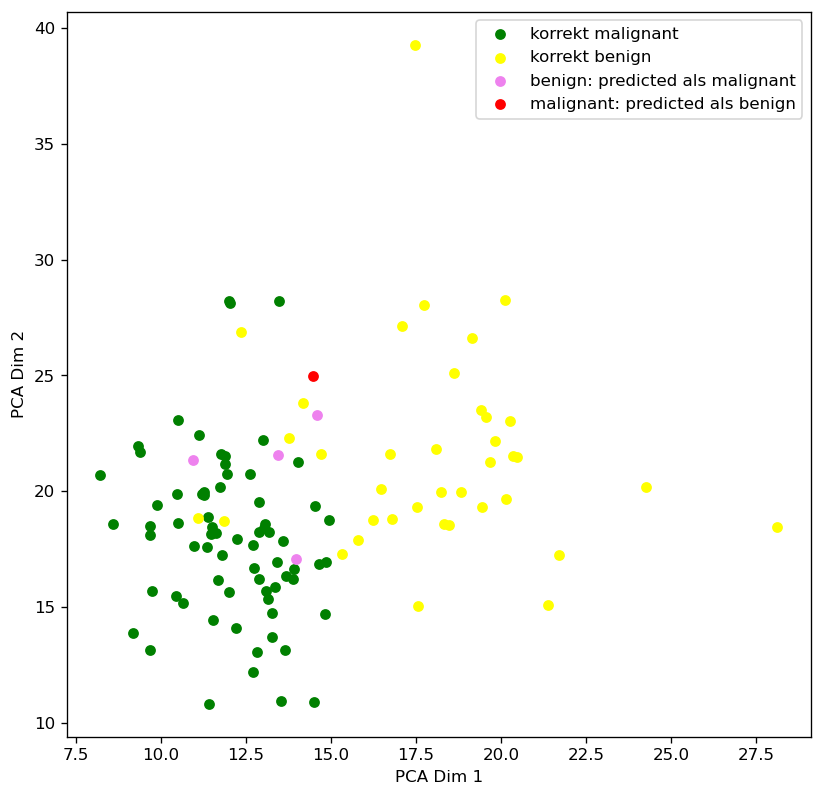

In [1]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import  Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

##########1##########
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                  'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data',
                  header=None)
##########2##########
X = df.loc[:, 2:].values #Spalte 0 enthält ID des Patienten, Spalte 1 das Label
y = df.loc[:, 1].values
##########3##########
le = LabelEncoder()
y = le.fit_transform(y)
##########4##########
X_train, X_test, y_train, y_test = \
train_test_split(X, y,test_size=0.20,stratify=y,shuffle=True,
                      random_state=1)
##########5##########
pipe=Pipeline([('scaler',StandardScaler()),\
               ('PCA',PCA(n_components=2)),('LG',LogisticRegression(solver="lbfgs",random_state=42))])
pipe.fit(X_train, y_train)
##########6##########
y_pred = pipe.predict(X_test)
##########7##########
print('Test Accuracy: %.3f' % pipe.score(X_test, y_test))
##########8##########
mask = np.logical_and(y_test!=y_pred, y_test==1)
y_test[mask]=2
mask = np.logical_and(y_test!=y_pred, y_test==0)
y_test[mask]=3
#########9##########
figure(figsize = (8, 8), dpi = 120)
colormap=np.array(["green","yellow","violet","red"])
plt.xlabel("PCA Dim 1")
plt.ylabel("PCA Dim 2")
labels=np.array(['korrekt malignant', 'korrekt benign',\
                 'benign: predicted als malignant', 'malignant: predicted als benign'])
for index in range(4):    
    plt.scatter(X_test[y_test==index, 0],X_test[y_test==index, 1],\
                color=colormap[index],s=30,label=labels[index])
plt.legend()
#########10##########
new_label=pipe.predict(X_test[3].reshape(1,-1))
print(f"predicted Label: {new_label[0]}, echtes Label: {y_test[3]}")
print(len(y_test[y_test==1]))


 Wir sehen, daß wir bei relativ guter Accuracy mehr falsch positive (predicted als malignant, sind aber benign, Anzahl 4) als das Gegenteil (Anzahl 1) haben, jede Fehlprediction hätte natürlich ernste Konsequenzen für die Patientin! Im einen Fall z.B. (Teil-)Entfernung der Brust bei benignen Tumor, im anderen Fall z.B. frühe Metastasierung wegen fehlender Entfernung des Primärtumors.

Nachdem wir die Automatisierung eines ML Verfahrens mit einer Pipelin demonstriert haben, zeigen wir jetzt ein Verfahren zur automatischen Optimierung von Hyperparametern, das ```Grid```. Dieses Grid erlaubt uns, für eine Aufzählung von Hyperparametern einen ML-Algorithmus mehrfach durchzuführen und dann das Optimum der Leistungsfähigkeit zu bestimmen. Wir nehmen wieder unsere daten von oben und kategorisieren die Testdaten diesmal mit einem Support Vektor Kategorisierer. Die Schritte 1 bis 4 sind identisch. Beim Aufbau der Pipeline (5) verwenden wir aber SVC. Wir bestimmen dann die Hyperparameter, die wir mit dem Grid untersuchen wollen. Der Wert für C stellt ja ein Maß für die Genauigkeit der Margins, ob wir also mehr Fehlklassifizierungen (höheres C) im Margin oder weniger (kleines C) erlauben. Außerdem vergleichen wir 2 verschiedene Kernels (linear vs. rbf). Zur genaueren Erklärung verweisen wir auf das Kapitel "Support Vektor Maschinen." Wir legen dann eine Liste an mit zu testenden Werten für unseren Hyperparameter (6). Dies kann natürlich auch für mehrere Hyperparameter erfolgen. Im nächsten Schritt (7) definieren wir welche Hyperparameter das Grid bearbeiten soll. Wir haben hier 2 Tests, die in Form einer Lioste von Dictionaries angelegt sind. Für unseren Klassifizierer "svc" soll der Parameter C über den Parameter-Bereich ```param_range``` getestet werden. Wir sprechen ihn an als key mit ```Namen des Klassifikators__Namen des Parameters```. Den Kernel geben wir ebenfalls ein. In (8) wird das Grid erstellt und gefittet. In (9) lassen wir uns den besten Wert für die Hyperparameter ausgeben.  und stellen dann das Ergebnis dar. In (10) machen wir mit diesen Hyperparametern unsere optimale Pipeline, fitten und predicten sie. Machen in (11) einen Ausdruck der Accuracy, codieren in (12) unsere Labels bei fehlkategorisierung um und stellen bei (13) das Ergebnis dar.

{'svc__C': 1.0, 'svc__kernel': 'linear'}
Test Accuracy: 0.965


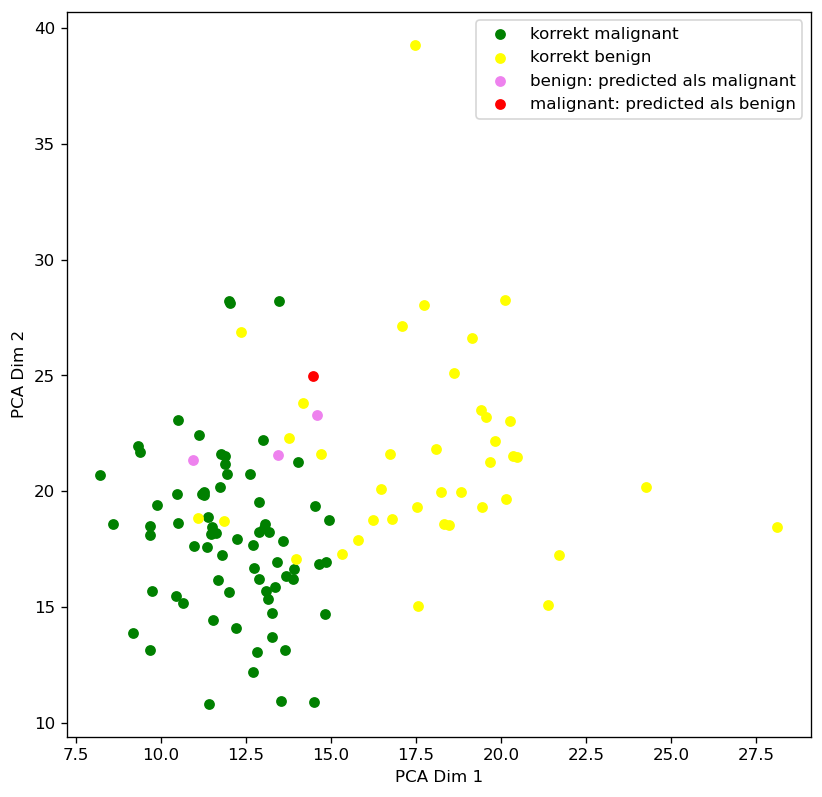

In [2]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import  Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

##########1##########
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                  'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data',
                  header=None)
##########2##########
X = df.loc[:, 2:].values #Spalte 0 enthält ID des Patienten, Spalte 1 das Label
y = df.loc[:, 1].values
##########3##########
le = LabelEncoder()
y = le.fit_transform(y)
##########4##########
X_train, X_test, y_train, y_test = \
train_test_split(X, y,test_size=0.20,stratify=y,shuffle=True,
                      random_state=1)
##########5##########
pipe=Pipeline([('scaler',StandardScaler()),\
               ('PCA',PCA(n_components=2)),('svc',SVC(random_state=42))])

#########6###########
param_range = [0.0001, 0.001, 0.01, 0.1,
                1.0, 10.0, 100.0, 1000.0]
##########7##########
param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
               {'svc__C': param_range,                
                'svc__kernel': ['rbf']}]
##########8##########
gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid, scoring='accuracy', cv=10, refit=True, n_jobs=-1)
gs = gs.fit(X_train, y_train)

##########9##########
#print(gs.best_score_)
print(gs.best_params_)
#########10##########
pipe_best=pipe=Pipeline([('scaler',StandardScaler()),\
               ('PCA',PCA(n_components=2)),('svc',SVC(C=1.0,kernel="linear",random_state=42))])

pipe_best.fit(X_train,y_train)
y_pred = pipe_best.predict(X_test)

##########11##########
print('Test Accuracy: %.3f' % pipe_best.score(X_test, y_test))
#########12##########
mask = np.logical_and(y_test!=y_pred, y_test==1)
y_test[mask]=2
mask = np.logical_and(y_test!=y_pred, y_test==0)
y_test[mask]=3
########13##########
figure(figsize = (8, 8), dpi = 120)
colormap=np.array(["green","yellow","violet","red"])
plt.xlabel("PCA Dim 1")
plt.ylabel("PCA Dim 2")
labels=np.array(['korrekt malignant', 'korrekt benign',\
                 'benign: predicted als malignant', 'malignant: predicted als benign'])
for index in range(4):    
    plt.scatter(X_test[y_test==index, 0],X_test[y_test==index, 1],\
                color=colormap[index],s=30,label=labels[index])
plt.legend()

Diese Methode hilft somit sehr beim fast immer notwendigen Optimieren der Hyperparameter.<br><br>
<b>Ein weiteres Verfahren, um den geeigneten Algorithmus und die optimalen die Hyperparameter zu finden, ist die k-fold Cross Validation. </b>Bei der Validation im allgemeinen teilen wir den Datensatz nicht in 2 sondern in 3 Teile auf. Den Ablauf der einfachsten Methode ("Holdout" = Abwarten und wiederholtes Testen des Validationdatensatzes bis zum Finden des optimalen ML-Algorithmus und dessen Hyperparametern) zeigt das nächste Bild.<br><br><img width=800 height=800  src="Images/Validation_Holdout.png"  /><br>

Wir optimiern unsere(n) Algorithmus(en) hier ohne den Testdatensatz zu berühren. Den Gesamttest machen wir erst, wenn der Trainingsdatensatz optimal bearbeitet wurde. Diese Methode<br><b> <br> @ erhöht die Qualität des ML-Verfahrens
<br>@ reduziert die Entwicklungskosten, weil nicht immer die gesamten Testdaten evaluiert werden müssen
<br>@ erkennt besser Fehler in der angewendeten Methode, weil vor Freigabe der Methode viele Verfahren und Hyperparameter gepüft werden können
<br>@ verhindert effektiv Overfitting oder Underfitting, weil je nach Methode viele verschiedene Validationsdatensätze geprüft werden können (s.u.).<br>
</b>
<br>
Bei der einfachen oben dargestellten Methode gibt es aber 2 Probleme. Zum einen verkleinern wir durch den Validationsdatensatz die Größe des Trainingsdatensatzes, was der Leistung unseres ML-Verfahrens oft nicht förderlich ist. Zum anderen hat der relativ kleine und immer gleiche Validationdatensatz und seine Abteilung vom Trainingsdatensatz einen oft übermässigen Einfluß auf die Auswahl der optimalen Methode und deren Parameter. Um diese Fehler zu umgehen und die Validations-Methode zu verbessern, wurde die k-fold Cross Validation entwickelt. Hierbei wird der Trainingsdatensatz in k Teile aufgeteilt, die jeweils einmal als Validationdatensatz für die Performanceprüfung verwendet werden. Diese Teile werden als folds bezeichnet, daher der Name k-fold. Den Ablauf zeigt das nächste Bild.<img width=800 src="Images/Cross_Validation.png" /><br><br>

Es werden hier 4 Folds gebildet aus den Trainingsdaten (im echten Leben meist ca. 10). Diese werden wie bei der Holdout Methode auf ihre Performance geprüft mit einem bestimmten ML-Algorithmus und einem Satz von Hyperparametern. Als Gesamtperformance wird dann der Mittelwert der Einzelperformance-Werte der Folds angenommen. Dieser dient dann wie vorher zur weiteren Optimierung. Damit wird der Trainingsdatensatz nicht verkleinert (wie oben) und die wechselnden Folds vermeiden das Overfitting eines bestimmten Validationdatensatzes für die Auswahl der Algorithmen und Parameter. Mit der Anzahl der Folds können wir Einfluß auf die möglichen Fehler der Methode nehmen. Viele Folds machen die Performanceabschätzung insgesamt sicherer insofern als der Einfluß einzelner Folds zurückgedrängt wird und die Größe des verbleibenden Trainingsdatensatzes jeweils steigt. Die Variance der als optimal eingestuften Parameter steigt aber auch und ebenfalls die Laufzeit. Bei kleinen Datensätzen empfiehlt sich eher die Verwendung von vielen Folds und umgekehrt.

In [3]:
from sklearn.model_selection import cross_val_score

einzelwerte = cross_val_score(estimator=pipe_best, X=X_train, y=y_train,cv=10, n_jobs=1)
print(f"Cross Validation Werte: {einzelwerte}")

print(f"Cross Validation Accuracy Mittelwert: {np.mean(einzelwerte)}, Standardabweichung+/-: {np.std(einzelwerte)}")




Cross Validation Werte: [0.93478261 0.93478261 0.95652174 0.97826087 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
Cross Validation Accuracy Mittelwert: 0.9516908212560387, Standardabweichung+/-: 0.016276680766175413


Mit dem oben gezeigten Skript können wir uns die Accuracy der einzelnen Folds anzeigen lassen und sicherer abschätzen, wie gut unser Algorithmus (hier die oben aufgebaute pipe) im Mittel wirklich ist für die Trainingsdaten. Wir haben jetzt die optimierten Werte aus dem Grid wieder verwendet. Besonders interessant wird die Methode , weil man über den n_jobs-Parameter bei entsprecheden Voraussetzungen der Hardware (multi_core...) mehrere Einzelvalidierungen der Folds parallel abarbeiten können, mit großen Vorteilen bezüglich der Laufzeit. Insgesamt gibt es einige Validations-Varianten, außerdem kann man natürlich die Validations-Methoden mit Grids kombinieren, um die besten Hyperparameter möglichst automatisiert zu finden. In diesem Tutorial wollen wir es aber damit bewenden lassen.